In [1]:
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


from collections import defaultdict, Counter

import matplotlib.colors as mcolors

In [2]:
os.getcwd()

'c:\\Users\\user\\Desktop\\Paper LeL\\Code'

In [4]:
df =pd.read_csv("..\\Data\\Correlations\\Properties_corrs\\all_models_corrs.csv", index_col=  "Model_arg")
df

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
Model_arg,,,,,,,,,,,,,,
DistilBERT_nsubj,0.70,0.30,0.22,0.18,0.54,0.42,0.46,0.48,0.22,0.69,0.59,0.26,0.72,0.32
DistilBERT_dobj,0.58,0.32,0.59,0.13,0.38,0.24,0.37,0.23,0.45,0.48,0.47,0.21,0.58,0.28
Pythia70m_nsubj,0.65,0.18,0.23,0.13,0.47,0.38,0.42,0.47,0.22,0.67,0.57,0.17,0.69,0.31
Pythia70m_dobj,0.20,0.29,0.45,0.03,0.26,0.15,0.19,0.11,0.36,0.17,0.21,0.07,0.24,0.25
GPT2-XL_nsubj,0.66,0.22,0.24,0.13,0.49,0.38,0.44,0.46,0.24,0.69,0.59,0.19,0.69,0.32
GPT2-XL_dobj,0.28,0.30,0.49,0.15,0.25,0.17,0.21,0.18,0.40,0.23,0.23,0.18,0.31,0.26


In [6]:
df

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
Model_arg,,,,,,,,,,,,,,
DistilBERT_nsubj,0.70,0.30,0.22,0.18,0.54,0.42,0.46,0.48,0.22,0.69,0.59,0.26,0.72,0.32
DistilBERT_dobj,0.58,0.32,0.59,0.13,0.38,0.24,0.37,0.23,0.45,0.48,0.47,0.21,0.58,0.28
Pythia70m_nsubj,0.65,0.18,0.23,0.13,0.47,0.38,0.42,0.47,0.22,0.67,0.57,0.17,0.69,0.31
Pythia70m_dobj,0.20,0.29,0.45,0.03,0.26,0.15,0.19,0.11,0.36,0.17,0.21,0.07,0.24,0.25
GPT2-XL_nsubj,0.66,0.22,0.24,0.13,0.49,0.38,0.44,0.46,0.24,0.69,0.59,0.19,0.69,0.32
GPT2-XL_dobj,0.28,0.30,0.49,0.15,0.25,0.17,0.21,0.18,0.40,0.23,0.23,0.18,0.31,0.26


## Single Properties
(by column)

In [5]:
df.T.style.background_gradient().set_properties()

Model_arg,DistilBERT_nsubj,DistilBERT_dobj,Pythia70m_nsubj,Pythia70m_dobj,GPT2-XL_nsubj,GPT2-XL_dobj
awareness,0.700000,0.580000,0.650000,0.200000,0.660000,0.280000
change_of_location,0.300000,0.320000,0.180000,0.290000,0.220000,0.300000
change_of_possession,0.220000,0.590000,0.230000,0.450000,0.240000,0.490000
change_of_state,0.180000,0.130000,0.130000,0.030000,0.130000,0.150000
change_of_state_continuous,0.540000,0.380000,0.470000,0.260000,0.490000,0.250000
existed_after,0.420000,0.240000,0.380000,0.150000,0.380000,0.170000
existed_before,0.460000,0.370000,0.420000,0.190000,0.440000,0.210000
existed_during,0.480000,0.230000,0.470000,0.110000,0.460000,0.180000
instigation,0.220000,0.450000,0.220000,0.360000,0.240000,0.400000
partitive,0.690000,0.480000,0.670000,0.170000,0.690000,0.230000


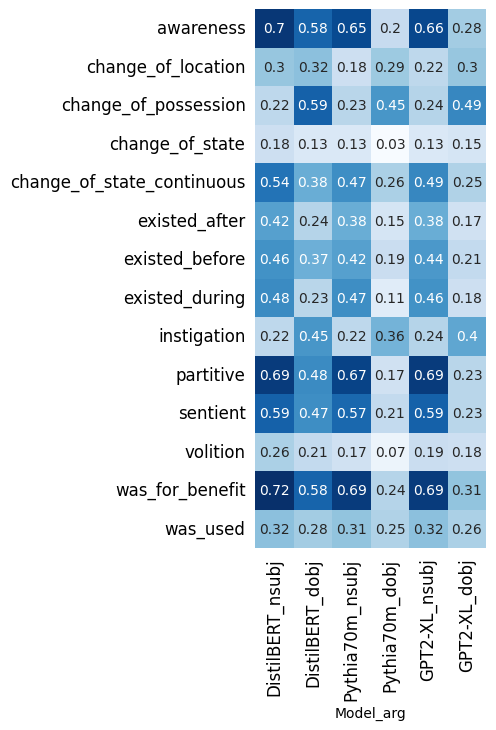

In [9]:

# plot of properties means comparison
plt.figure(figsize= (9,7))

ax = sns.heatmap(df.T, cmap = 'Blues', square= True,
                 cbar = False, annot = True
                )

# remove ticks and set position and orientation for ticks label
ax.tick_params(labeltop = False, labelbottom = True,
                labelsize = 12, bottom = False, left = False)

In [8]:
#isolate nsubj and dobj properties correlation
nsubj = []
dobj = []
for n, r in enumerate(df.to_records().tolist()):
    if n % 2 == 0:
        nsubj.append(r)
    else:
        dobj.append(r)
df_nsubj = pd.DataFrame(nsubj, columns = ["Model"]+ df.columns.tolist()).set_index("Model")
df_dobj = pd.DataFrame(dobj, columns = ["Model"]+ df.columns.tolist()).set_index("Model")

In [6]:
df_nsubj.T.style.background_gradient()

Model,DistilBERT_nsubj,Pythia70m_nsubj,GPT2-XL_nsubj
awareness,0.700000,0.650000,0.660000
change_of_location,0.300000,0.180000,0.220000
change_of_possession,0.220000,0.230000,0.240000
change_of_state,0.180000,0.130000,0.130000
change_of_state_continuous,0.540000,0.470000,0.490000
existed_after,0.420000,0.380000,0.380000
existed_before,0.460000,0.420000,0.440000
existed_during,0.480000,0.470000,0.460000
instigation,0.220000,0.220000,0.240000
partitive,0.690000,0.670000,0.690000


In [7]:
df_dobj.T.style.background_gradient()

Model,DistilBERT_dobj,Pythia70m_dobj,GPT2-XL_dobj
awareness,0.580000,0.200000,0.280000
change_of_location,0.320000,0.290000,0.300000
change_of_possession,0.590000,0.450000,0.490000
change_of_state,0.130000,0.030000,0.150000
change_of_state_continuous,0.380000,0.260000,0.250000
existed_after,0.240000,0.150000,0.170000
existed_before,0.370000,0.190000,0.210000
existed_during,0.230000,0.110000,0.180000
instigation,0.450000,0.360000,0.400000
partitive,0.480000,0.170000,0.230000


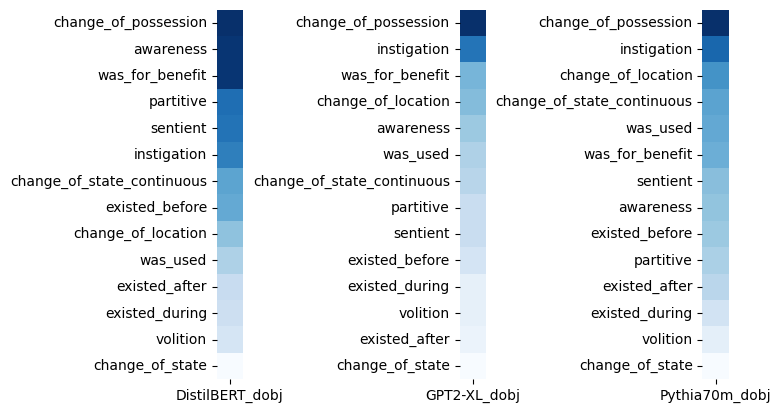

In [9]:
pythia_dobj = df_dobj.T["Pythia70m_dobj"].sort_values(ascending= False).to_frame() #.style.background_gradient()
DB_dobj = df_dobj.T["DistilBERT_dobj"].sort_values(ascending= False).to_frame()
gpt_dobj = df_dobj.T["GPT2-XL_dobj"].sort_values(ascending= False).to_frame()

fig, axis = plt.subplots(1,3 )

sns.heatmap(DB_dobj, ax = axis[0], cmap = "Blues", cbar= False, square= True, annot = False)
sns.heatmap(gpt_dobj, ax = axis[1], cmap = "Blues", cbar= False, square= True, annot = False)
sns.heatmap(pythia_dobj, ax = axis[2], cmap = "Blues", cbar= False, square= True, annot = False)
plt.subplots_adjust(right = 1.2)

plt.show()

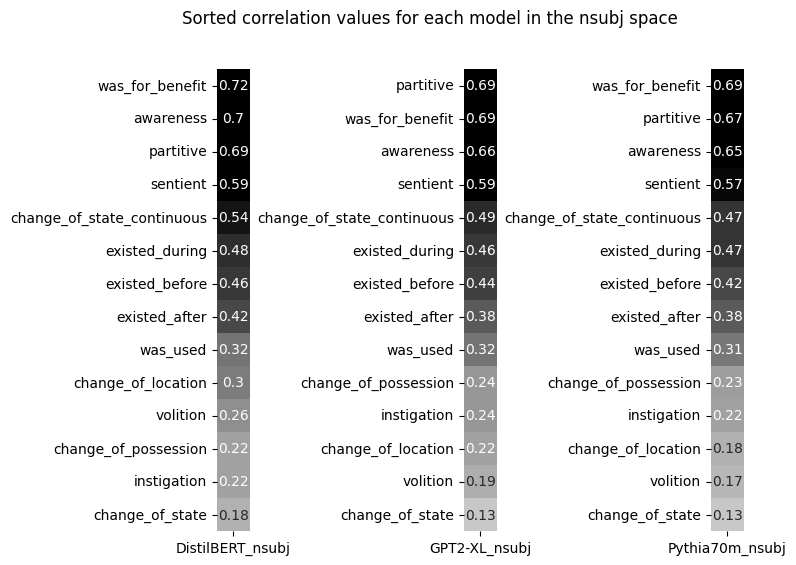

In [57]:
pythia_nsubj = df_nsubj.T["Pythia70m_nsubj"].sort_values(ascending= False).to_frame() #.style.background_gradient()
DB_nsubj = df_nsubj.T["DistilBERT_nsubj"].sort_values(ascending= False).to_frame()
gpt_nsubj = df_nsubj.T["GPT2-XL_nsubj"].sort_values(ascending= False).to_frame()

 # combine colors and build a new colormap
colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
cmap = divergentGrays
maxv = 0

for mat in df_dobj.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))
        
fig, axis = plt.subplots(1,3  ,figsize = (8,6) )

fig.suptitle("Sorted correlation values for each model in the nsubj space")
sns.heatmap(DB_nsubj, ax = axis[0], cmap = divergentGrays, cbar= False, square= True, annot = True, vmax=maxv,vmin=-maxv)

sns.heatmap(gpt_nsubj, ax = axis[1], cmap = divergentGrays, cbar= False, square= True,annot = True, vmax=maxv,vmin=-maxv)

sns.heatmap(pythia_nsubj, ax = axis[2], cmap = divergentGrays, cbar= False, square= True, annot = True, vmax=maxv,vmin=-maxv)

plt.subplots_adjust(right = 1)

plt.show()

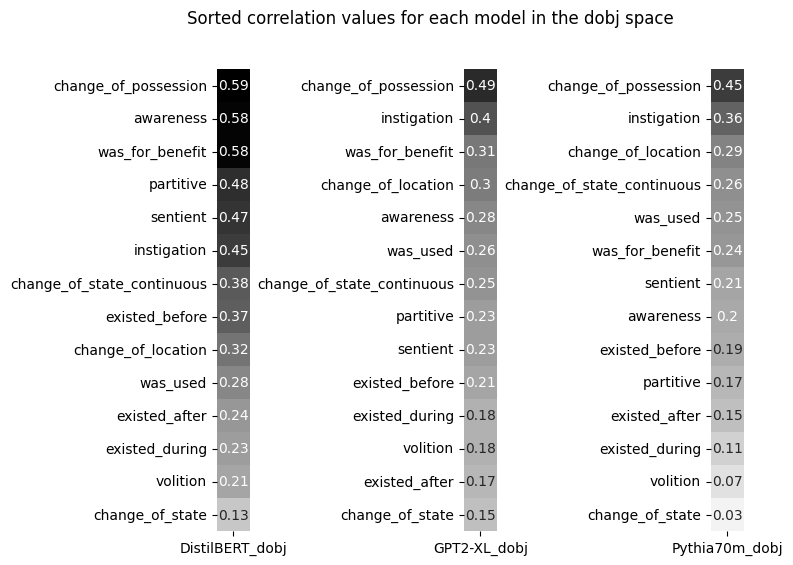

In [59]:
pythia_dobj = df_dobj.T["Pythia70m_dobj"].sort_values(ascending= False).to_frame() 
DB_dobj = df_dobj.T["DistilBERT_dobj"].sort_values(ascending= False).to_frame()
gpt_dobj = df_dobj.T["GPT2-XL_dobj"].sort_values(ascending= False).to_frame()

colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
cmap = divergentGrays
maxv = 0

for mat in df_dobj.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))
        
fig, axis = plt.subplots(1,3  ,figsize = (8,6) )

fig.suptitle("Sorted correlation values for each model in the dobj space")
sns.heatmap(DB_dobj, ax = axis[0], cmap = divergentGrays, cbar= False, square= True, annot = True, vmax=maxv,vmin=-maxv)

sns.heatmap(gpt_dobj, ax = axis[1], cmap = divergentGrays, cbar= False, square= True,annot = True, vmax=maxv,vmin=-maxv)

sns.heatmap(pythia_dobj, ax = axis[2], cmap = divergentGrays, cbar= False, square= True, annot = True, vmax=maxv,vmin=-maxv)

plt.subplots_adjust(right = 1)

plt.show()

---
## Adding BERT

In [98]:
#adding BERT

bert_nsubj = pd.read_csv("..\\Data\\Correlations\\Properties_corrs\\BERT_nsubj_prop_corr.csv").set_index("Property").round(2)
bert_nsubj.rename(columns ={"Correlation score": "BERT_large_nsubj"},inplace = True)
bert_nsubj.index.name = None


bert_dobj = pd.read_csv("..\\Data\\Correlations\\Properties_corrs\\BERT_dobj_prop_corr.csv").set_index("Property").round(2)
bert_dobj.rename(columns ={"Correlation score": "BERT_large_dobj"},  inplace = True)
bert_dobj.index.name = None

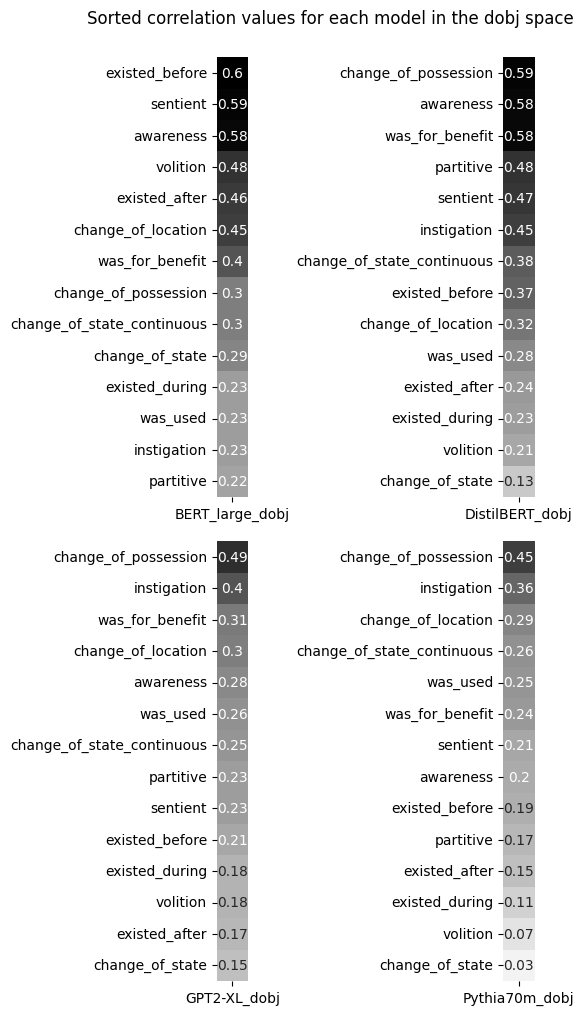

In [104]:
pythia_dobj = df_dobj.T["Pythia70m_dobj"].sort_values(ascending= False).to_frame() 
DB_dobj = df_dobj.T["DistilBERT_dobj"].sort_values(ascending= False).to_frame()
gpt_dobj = df_dobj.T["GPT2-XL_dobj"].sort_values(ascending= False).to_frame()

colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
cmap = divergentGrays
maxv = 0
        
fig, axis = plt.subplots(2,2  ,figsize = (14,12) )


for mat in bert_dobj.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

sns.heatmap(bert_dobj, ax = axis[0,0], cmap = divergentGrays, cbar= False, square= True, annot = True, vmax=maxv,vmin=-maxv)

for mat in df_dobj.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

fig.suptitle("Sorted correlation values for each model in the dobj space", x = 0.28, y = 0.92)
sns.heatmap(DB_dobj, ax = axis[0,1], cmap = divergentGrays, cbar= False, square= True, annot = True, vmax=maxv,vmin=-maxv)

sns.heatmap(gpt_dobj, ax = axis[1,0], cmap = divergentGrays, cbar= False, square= True,annot = True, vmax=maxv,vmin=-maxv)

sns.heatmap(pythia_dobj, ax = axis[1,1], cmap = divergentGrays, cbar= False, square= True, annot = True, vmax=maxv,vmin=-maxv)

plt.subplots_adjust(right = 0.5, hspace= 0.1)

plt.show()

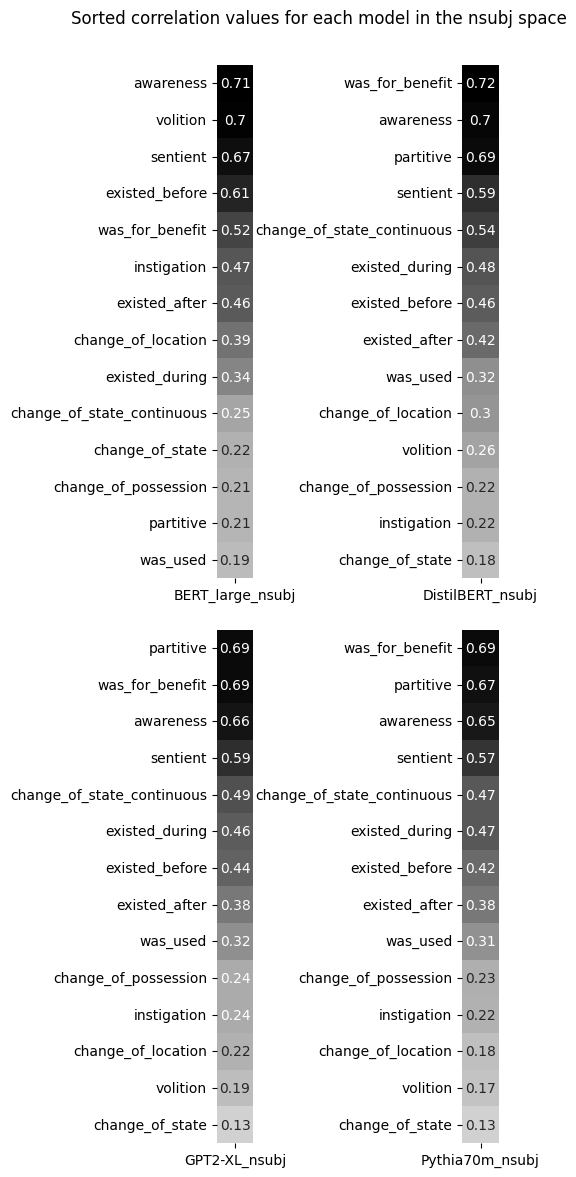

In [168]:
pythia_nsubj = df_nsubj.T["Pythia70m_nsubj"].sort_values(ascending= False).to_frame() #.style.background_gradient()
DB_nsubj = df_nsubj.T["DistilBERT_nsubj"].sort_values(ascending= False).to_frame()
gpt_nsubj = df_nsubj.T["GPT2-XL_nsubj"].sort_values(ascending= False).to_frame()

colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
cmap = divergentGrays
maxv = 0
        
fig, axis = plt.subplots(2,2  ,figsize = (12,14) )


for mat in bert_nsubj.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

sns.heatmap(bert_nsubj, ax = axis[0,0], cmap = divergentGrays, cbar= False, square= True, annot = True, vmax=maxv,vmin=-maxv)

for mat in df_nsubj.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

fig.suptitle("Sorted correlation values for each model in the nsubj space", x = 0.28, y = 0.92)
sns.heatmap(DB_nsubj, ax = axis[0,1], cmap = divergentGrays, cbar= False, square= True, annot = True, vmax=maxv,vmin=-maxv)

sns.heatmap(gpt_nsubj, ax = axis[1,0], cmap = divergentGrays, cbar= False, square= True,annot = True, vmax=maxv,vmin=-maxv)

sns.heatmap(pythia_nsubj, ax = axis[1,1], cmap = divergentGrays, cbar= False, square= True, annot = True, vmax=maxv,vmin=-maxv)

plt.subplots_adjust(right = 0.5, hspace= 0.1)

plt.show()

---

In [3]:
nsubj_props = pickle.load(open("..\\Data\\Correlations\\Properties_corrs\\DistilBERT_nsubj.pkl", "rb"))
dobj_props = pickle.load(open("..\\Data\\Correlations\\Properties_corrs\\DistilBERT_dobj.pkl", "rb"))

In [4]:
nsubj = pd.DataFrame(nsubj_props.most_common(), columns = ["prop", "values"]).set_index("prop")
dobj = pd.DataFrame(dobj_props.most_common(), columns = ["prop", "values"]).set_index("prop")

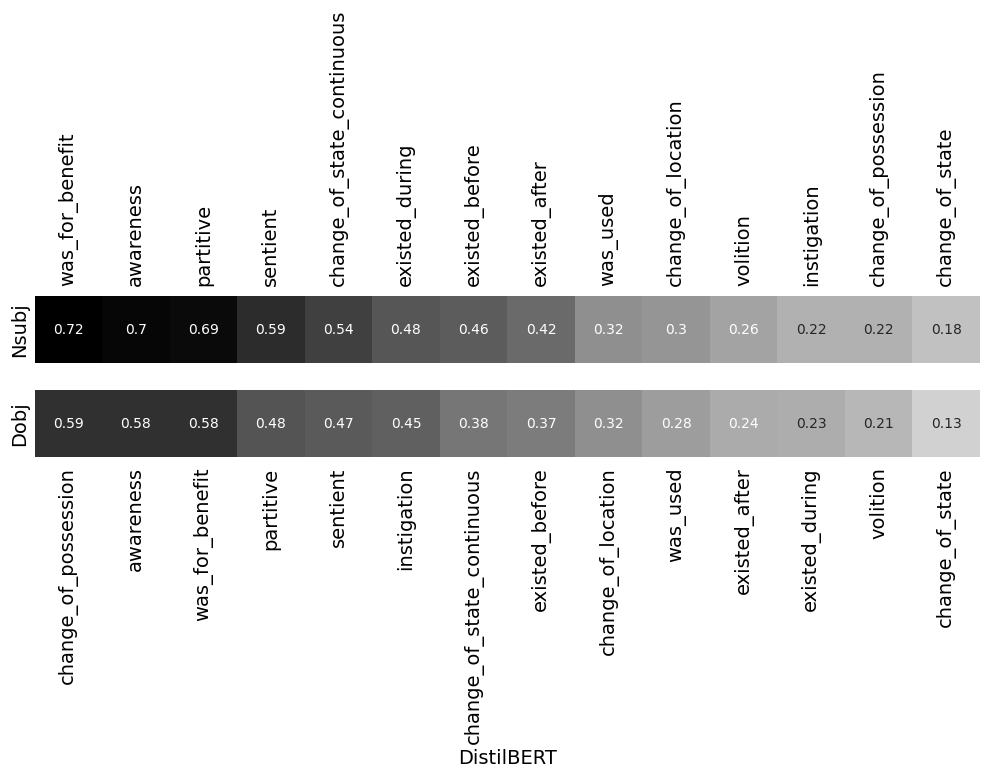

In [38]:
def plot_single_properties(nsubj_props, dobj_props, black_n_white = True, model_name = ""):    
    
    #set the hm color
    if black_n_white:
        # combine colors and build a new colormap
        colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
        colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))
        colors = np.vstack((colors1, colors2))
        divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
        cmap = divergentGrays
        maxv = 0
        
        for mat in nsubj.values:    
            maxv = max(maxv, max(mat.max(), - mat.min()))
        
    
    else:
        cmap = "Blues"
    

    #get the axis to plot two subplots
    fig, (ax1, ax2) = plt.subplots(nrows=2,figsize= (10,8), squeeze= True)
    
    #make the nsubj row
    sns.heatmap(nsubj_props.T, ax = ax1, square = True,
                cmap = cmap, yticklabels= False,
                annot = True, cbar = False,vmin = -maxv, vmax = maxv,)

    #ax1.tick_params(labeltop = True, labelbottom = False, rotation = 'vertical')
    ax1.tick_params(bottom = False, labeltop = True, labelbottom = False, rotation = 90, labelsize = 14)
    ax1.set_xlabel("")
    ax1.set_ylabel('Nsubj', size = 14)

    #make the dobj row
    sns.heatmap(dobj_props.T, ax = ax2, square = True,
                cmap = cmap, yticklabels= False,
                annot = True, cbar = False, vmin = -maxv, vmax = maxv,)

    #ax2.tick_params(bottom = False, labeltop = False, labelbottom = True, rotation = 90, labelsize = 14)
    ax2.tick_params(bottom = False,labelsize = 14)
    ax2.set_xlabel('DistilBERT', size = 14)
    ax2.set_ylabel('Dobj', size = 14)

    fig.subplots_adjust(hspace=0.01)
    plt.tight_layout()
    #plt.title(model_name)
    plt.show()


plot_single_properties(nsubj, dobj, model_name= "DistilBERT")

---


## Anticausative Predictions

In [81]:
pythia_predictions = pd.read_csv("..\\Data\\Results\\pythia_AC_predictions.csv", index_col= "Verb").round(2)
DB_predictions = pd.read_csv("..\\Data\\Results\\distilBERT_AC_predictions.csv", index_col= "Verb").round(2)
gpt2_predictions = pd.read_csv("..\\Data\\Results\\gpt2-xl_AC_predictions.csv", index_col= "Verb").round(2)

In [61]:
pythia_predictions

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
Verb,,,,,,,,,,,,,,
break.0,0.625389,0.262018,0.155215,0.261666,0.271080,0.381457,0.323559,0.149467,0.637302,0.159295,0.569905,0.653735,0.599808,0.338587
break.1,0.063795,0.201303,0.814270,0.513567,0.492840,0.162959,0.110990,0.252414,0.307384,0.452393,0.058546,0.081284,0.123308,0.555879
bend.2,0.883085,0.293436,0.000000,0.319472,0.353330,0.927500,0.873238,0.828339,0.939128,0.234627,0.878222,0.889806,0.848793,0.476578
bend.3,0.482494,0.492701,0.595894,0.499397,0.499766,0.790532,0.803092,0.804530,0.602130,0.655887,0.529246,0.469681,0.483543,0.514494
bake.4,0.553594,0.402038,0.289649,0.322087,0.332782,0.514089,0.515779,0.368040,0.533476,0.236662,0.571472,0.546600,0.527545,0.223653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
revolve.95,0.604453,0.365691,0.333939,0.330359,0.329321,0.566080,0.565301,0.414422,0.584942,0.379725,0.593167,0.599644,0.549714,0.302785
smash.96,0.966710,0.748635,0.349893,0.663866,0.654076,0.959922,0.944391,0.842318,0.946061,0.409936,0.928096,0.966517,0.951014,0.966086
smash.97,0.418303,0.196718,0.548667,0.305006,0.284150,0.456260,0.461184,0.399782,0.517434,0.479954,0.413209,0.421891,0.399488,0.421258


In [76]:
DB_predictions.round(2)

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
Verb,,,,,,,,,,,,,,
break.0,0.94,0.90,0.18,0.52,0.54,0.84,0.76,0.75,0.74,0.10,0.95,0.89,0.81,0.57
break.1,0.26,0.51,0.76,0.63,0.61,0.32,0.21,0.40,0.18,0.34,0.24,0.24,0.23,0.65
bend.2,0.81,0.43,0.39,0.01,0.00,0.65,0.66,0.55,0.78,0.26,0.80,0.83,0.73,0.67
bend.3,0.41,0.48,0.65,0.43,0.45,0.59,0.51,0.62,0.33,0.84,0.40,0.37,0.33,0.57
bake.4,0.90,0.67,0.40,0.25,0.24,0.64,0.68,0.55,0.80,0.21,0.89,0.92,0.84,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
revolve.95,0.27,0.28,0.62,0.31,0.31,0.11,0.12,0.11,0.06,0.37,0.28,0.23,0.23,0.18
smash.96,0.83,0.82,0.39,0.46,0.48,0.87,0.82,0.84,0.65,0.52,0.84,0.78,0.74,0.62
smash.97,0.35,0.66,0.51,0.82,0.86,0.40,0.36,0.61,0.27,0.54,0.33,0.30,0.45,0.41


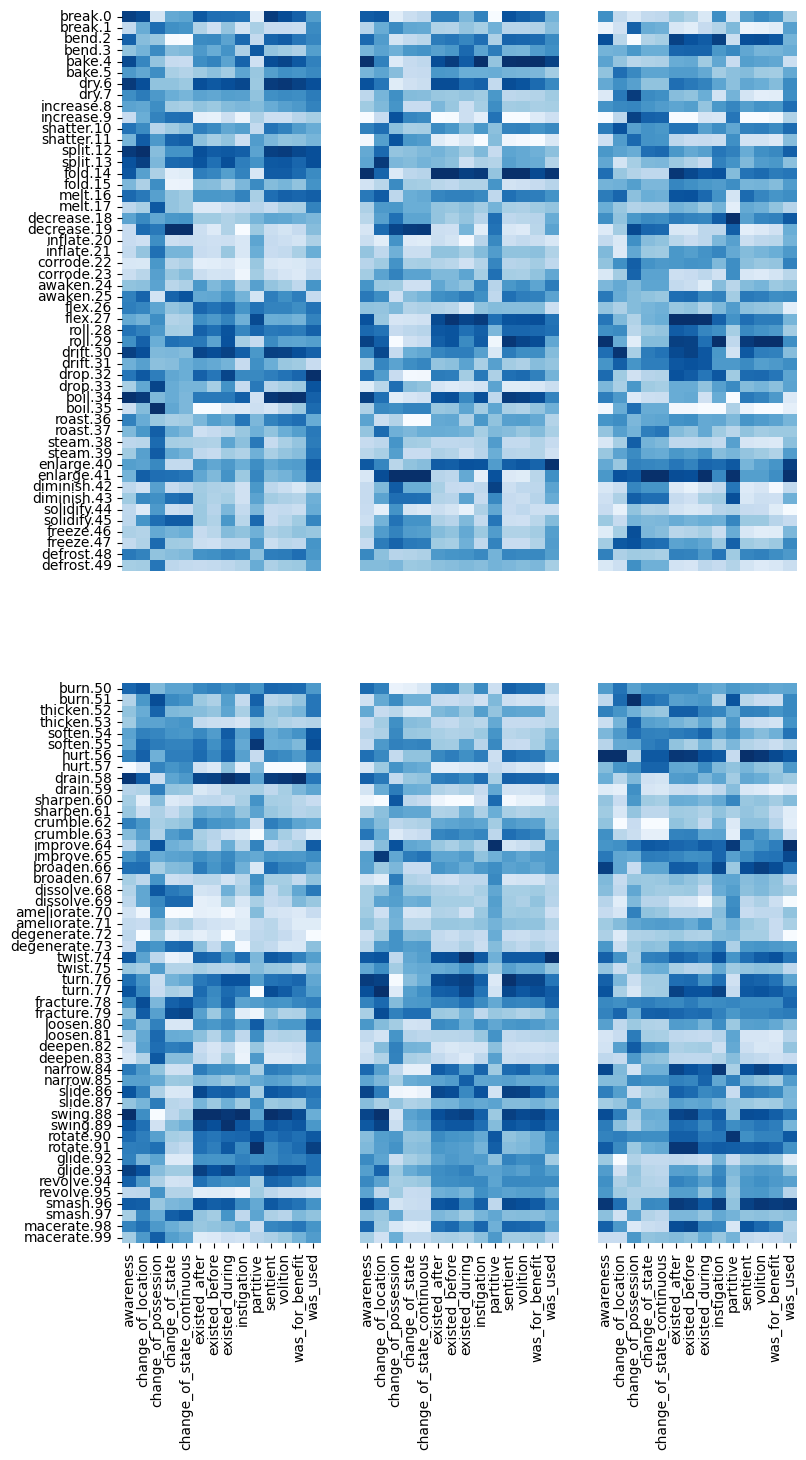

In [161]:
fig, axs = plt.subplots(2,3, figsize = (18,16))

sns.heatmap(DB_predictions[:50], ax = axs[0,0], cmap = "Blues", cbar = False, 
            yticklabels= True, xticklabels= False)


sns.heatmap(gpt2_predictions[:50], ax = axs[0,1], cmap = "Blues", cbar = False, 
            yticklabels= False, xticklabels= False)

sns.heatmap(pythia_predictions[:50], ax = axs[0,2], cmap = "Blues", cbar = False, 
            yticklabels= False, xticklabels= False)



sns.heatmap(DB_predictions[50:], ax = axs[1,0], cmap = "Blues", cbar = False, 
            yticklabels= True, xticklabels= True)

sns.heatmap(gpt2_predictions[50:], ax = axs[1,1], cmap = "Blues", cbar = False, 
            yticklabels= False, xticklabels= True)

sns.heatmap(pythia_predictions[50:], ax = axs[1,2], cmap = "Blues", cbar = False, 
            yticklabels= False, xticklabels= True)
plt.subplots_adjust(right = 0.5)

for i in axs:
    for e in i:
        e.set_ylabel("")


plt.show()

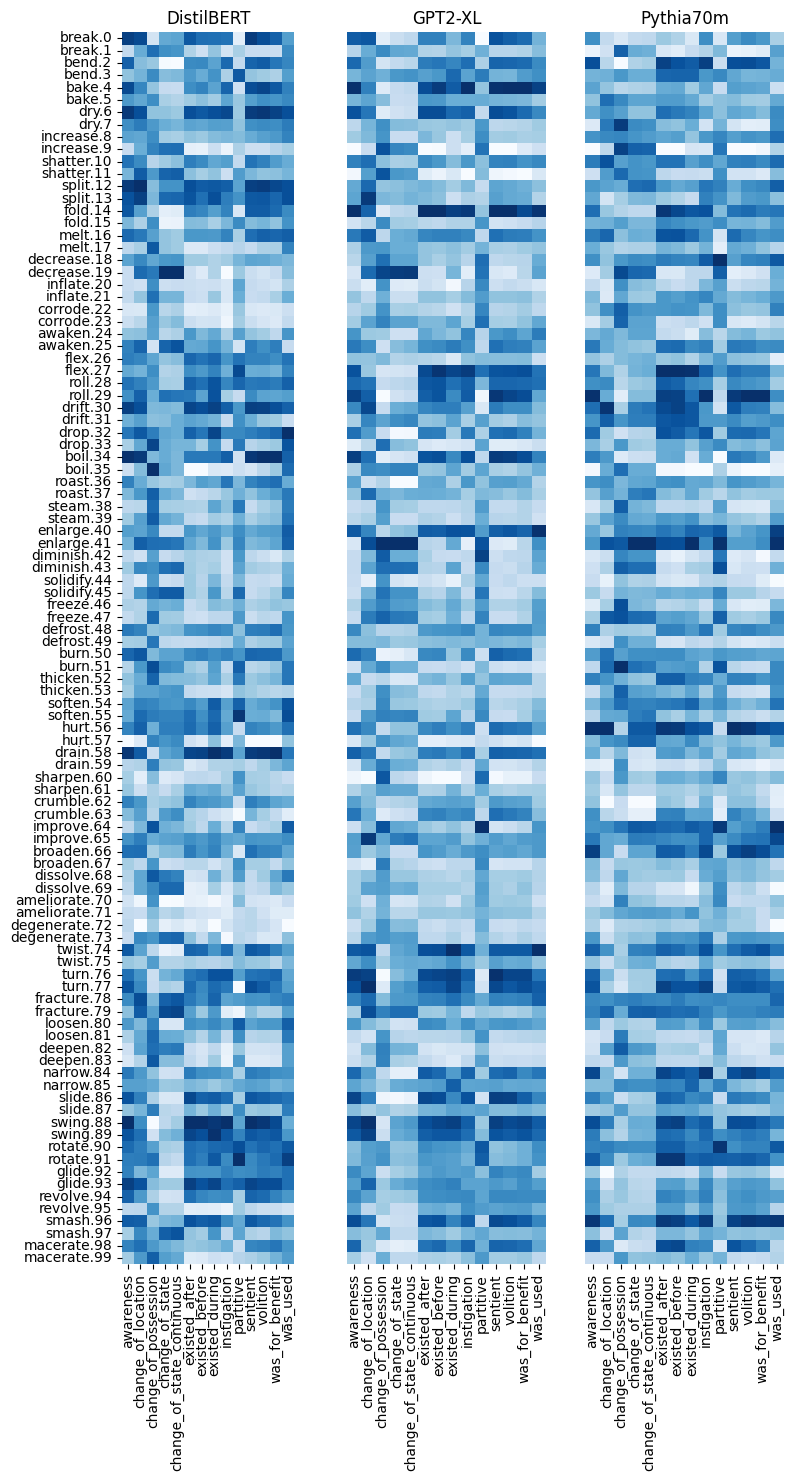

In [179]:
fig, axs = plt.subplots(1,3, figsize = (18,16))

sns.heatmap(DB_predictions, ax = axs[0], cmap = "Blues", cbar = False, 
            yticklabels= True, xticklabels= True,square = True)
axs[0].title.set_text("DistilBERT")

sns.heatmap(gpt2_predictions, ax = axs[1], cmap = "Blues", cbar = False, 
            yticklabels= False, xticklabels= True)
axs[1].title.set_text("GPT2-XL")
sns.heatmap(pythia_predictions, ax = axs[2], cmap = "Blues", cbar = False, 
            yticklabels= False, xticklabels= True)
axs[2].title.set_text("Pythia70m")

plt.subplots_adjust(right = 0.5)

for i in axs:
    i.set_ylabel("")



plt.show()

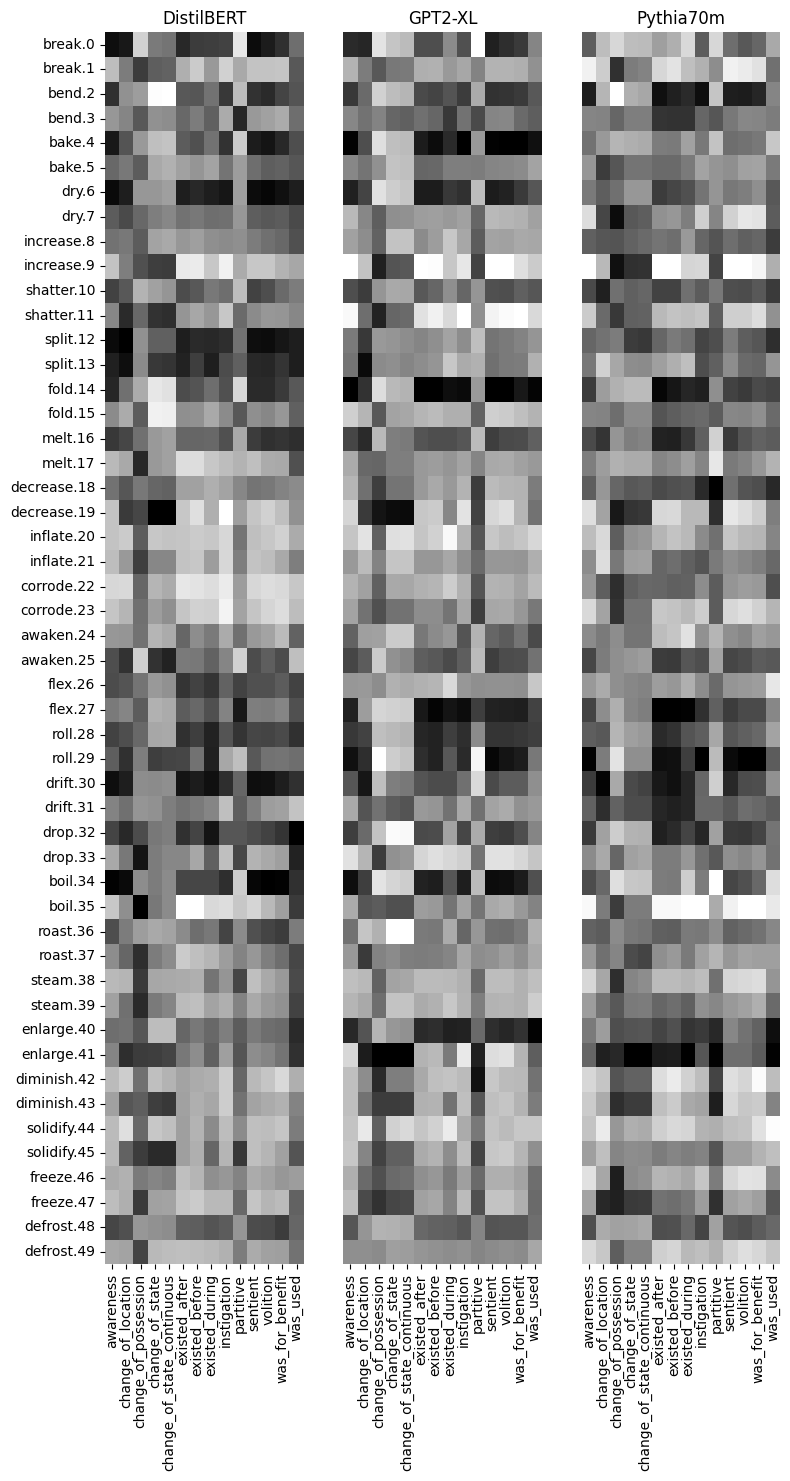

In [82]:
fig, axs = plt.subplots(1,3, figsize = (18,16))
colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
cmap = divergentGrays
maxv = 0

for mat in DB_predictions.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

#DistilBERT
sns.heatmap(DB_predictions[:50], ax = axs[0], cmap = cmap, cbar = False, yticklabels= True, xticklabels= True, vmax = maxv, vmin = -maxv)
axs[0].title.set_text("DistilBERT")

#GPT2
maxv = 0

for mat in gpt2_predictions.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

sns.heatmap(gpt2_predictions[:50], ax = axs[1], cmap = cmap, cbar = False, yticklabels= False, xticklabels= True, vmax = maxv, vmin = -maxv)
axs[1].title.set_text("GPT2-XL")


#Pythia
maxv = 0

for mat in pythia_predictions.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

sns.heatmap(pythia_predictions[:50], ax = axs[2], cmap = cmap, cbar = False,yticklabels= False, xticklabels= True, vmax = maxv, vmin = -maxv)
axs[2].title.set_text("Pythia70m")

plt.subplots_adjust(right = 0.5)

for i in axs:
    i.set_ylabel("")

plt.show()

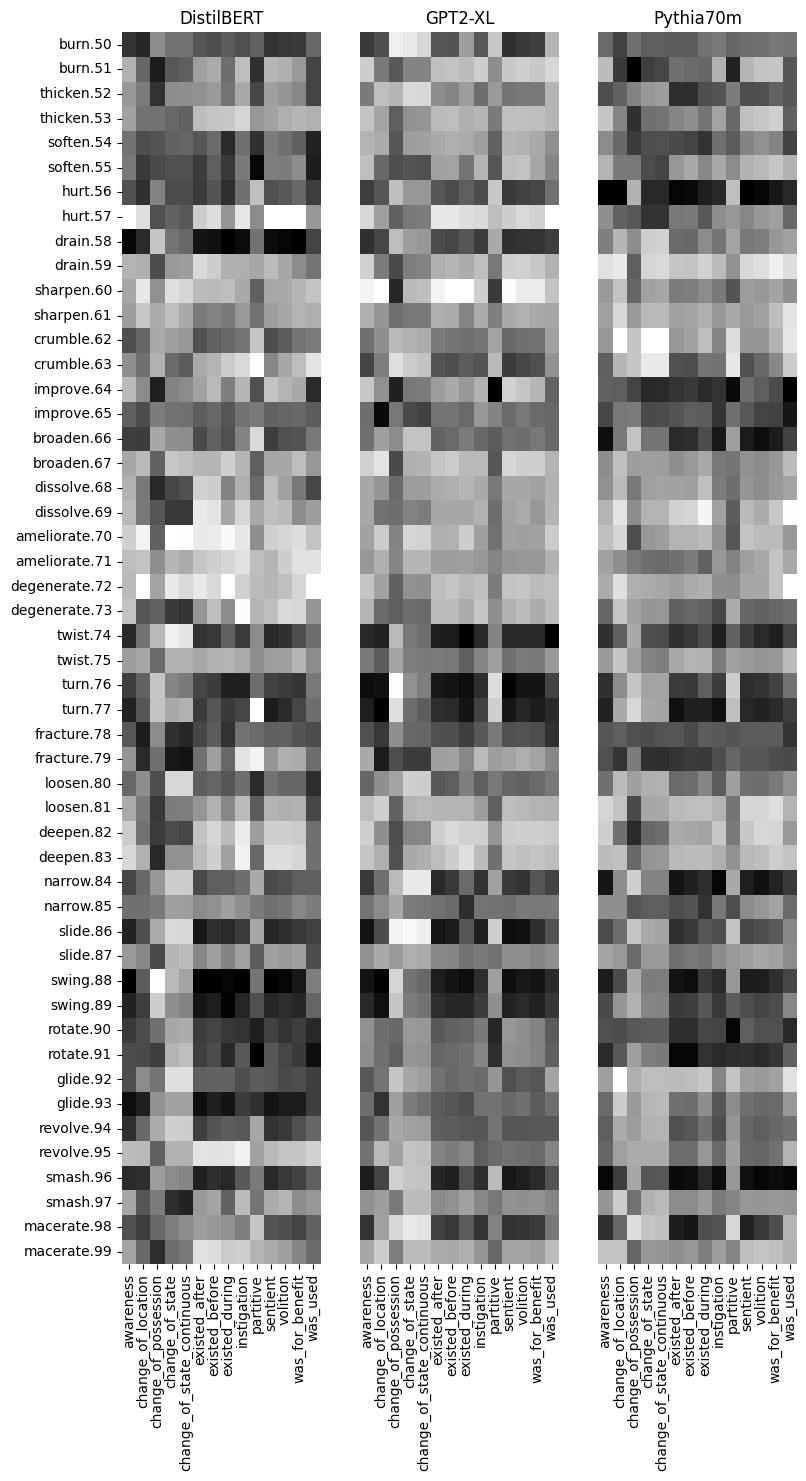

In [83]:
fig, axs = plt.subplots(1,3, figsize = (18,16))
colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
cmap = divergentGrays
maxv = 0

for mat in DB_predictions.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

#DistilBERT
sns.heatmap(DB_predictions[50:], ax = axs[0], cmap = cmap, cbar = False, yticklabels= True, xticklabels= True, vmax = maxv, vmin = -maxv)
axs[0].title.set_text("DistilBERT")

#GPT2
maxv = 0

for mat in gpt2_predictions.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

sns.heatmap(gpt2_predictions[50:], ax = axs[1], cmap = cmap, cbar = False, yticklabels= False, xticklabels= True, vmax = maxv, vmin = -maxv)
axs[1].title.set_text("GPT2-XL")


#Pythia
maxv = 0

for mat in pythia_predictions.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

sns.heatmap(pythia_predictions[50:], ax = axs[2], cmap = cmap, cbar = False,yticklabels= False, xticklabels= True, vmax = maxv, vmin = -maxv)
axs[2].title.set_text("Pythia70m")

plt.subplots_adjust(right = 0.5)

for i in axs:
    i.set_ylabel("")

plt.show()

---
## Aggregate Average properties predictions

In [107]:
avg_pred = pd.read_csv("..\\Data\\Results\\average_AC_preds.csv").set_index(["Embeddings", "Subspace"])

avg_pred

awareness  change_of_location  change_of_possession  \
Embeddings Subspace                                                        
DistilBERT Tr         0.634264            0.579105              0.492200   
           Intr       0.421116            0.545654              0.627759   
Pythia70m  Tr         0.581750            0.473241              0.453611   
           Intr       0.418134            0.418781              0.569408   
GPT2-XL    Tr         0.592351            0.546613              0.383131   
           Intr       0.382377            0.535038              0.552430   

                     change_of_state  change_of_state_continuous  \
Embeddings Subspace                                                
DistilBERT Tr               0.371202                    0.380466   
           Intr             0.524443                    0.528171   
Pythia70m  Tr               0.471403                    0.468434   
           Intr             0.514143                    0.512286   
GPT2-XL    Tr               0.312536                    0.326500   
           Intr             0.482073                    0.489299   

                     existed_after  existed_before  existed_during  \
Embeddings Subspace                                                  
DistilBERT Tr             0.591683        0.562294        0.599507   
           Intr           0.407846        0.361201        0.461077   
Pythia70m  Tr             0.625599        0.612705        0.542089   
           Intr           0.512700        0.495737        0.498353   
GPT2-XL    Tr             0.583733        0.574466        0.506604   
           Intr           0.415744        0.413463        0.463236   

                     instigation  partitive  sentient  volition  \
Embeddings Subspace                                               
DistilBERT Tr           0.558053   0.481313  0.620313  0.625346   
           Intr         0.316142   0.497432  0.408927  0.403508   
Pythia70m  Tr           0.614787   0.461858  0.576102  0.579730   
           Intr         0.487486   0.524127  0.420204  0.411415   
GPT2-XL    Tr           0.586212   0.456510  0.598768  0.596184   
           Intr         0.387948   0.532451  0.392293  0.376370   

                     was_for_benefit  was_used  
Embeddings Subspace                             
DistilBERT Tr               0.606754  0.624216  
           Intr             0.411834  0.551677  
Pythia70m  Tr               0.544608  0.527474  
           Intr             0.393270  0.456711  
GPT2-XL    Tr               0.580123  0.534055  
           Intr             0.415312  0.415444

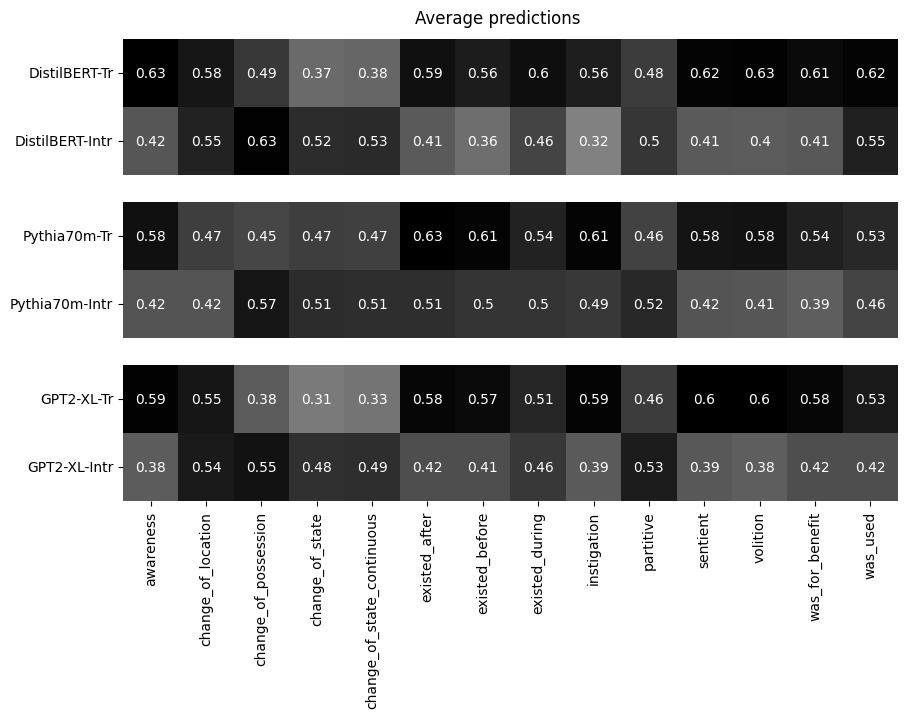

In [174]:
fig, axs = plt.subplots(3,1, figsize = (10,6))
colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
cmap = divergentGrays
maxv = 0

for mat in avg_pred[:2].values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

sns.heatmap(avg_pred[:2], ax = axs[0], cmap = cmap, cbar = False, annot = True, xticklabels= False, vmax=maxv, vmin = -maxv)
# axs[0].tick_params(axis = "x",labeltop = True, labelbottom = False, rotation = 90)

# axs[0].set_xticks(range(len(avg_pred.columns)), labels = avg_pred.columns)
maxv = 0
for mat in avg_pred[2:4].values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))
sns.heatmap(avg_pred[2:4], ax = axs[1], cmap = cmap, cbar = False, annot = True, xticklabels= False,vmax=maxv, vmin = -maxv)

maxv = 0
for mat in avg_pred[4:].values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))
    
sns.heatmap(avg_pred[4:], ax = axs[2], cmap = cmap, cbar = False, annot = True, xticklabels= True,vmax=maxv, vmin = -maxv)
plt.suptitle("Average predictions", y = 0.93)
for ax in axs:
    ax.set_ylabel("")
plt.show()

In [111]:
#adding BERT
pred_verbs = pd.read_csv("C:\\Users\\user\\Desktop\\Mattia\\Tesi\\df_miei\\predicted_verbs.csv", index_col = 'Token.Sent')
transitive_use = []
intransitive_use = []

transitive_use_ids = []
intransitive_use_ids = []

for i, e in enumerate([i for i in pred_verbs.values]):
    if  i % 2 == 0:
        transitive_use.append(e)
    else:
        intransitive_use.append(e)
for n, id in enumerate(pred_verbs.index):
    if n % 2 == 0:
        transitive_use_ids.append(id)
    else:
        intransitive_use_ids.append(id)

only_transitive_use = pd.DataFrame(transitive_use, columns = pred_verbs.columns, index = transitive_use_ids)

only_intransitive_use = pd.DataFrame(intransitive_use, columns = pred_verbs.columns, index = intransitive_use_ids)

# dataframe containing properties means for both transitive and intransitive use 
mean_comparison = only_transitive_use.mean().to_frame(name = 'BERT-Tr').merge(
                                only_intransitive_use.mean().to_frame(name = 'BERT-Intr'), 
                                left_index= True, right_index= True).T
mean_comparison

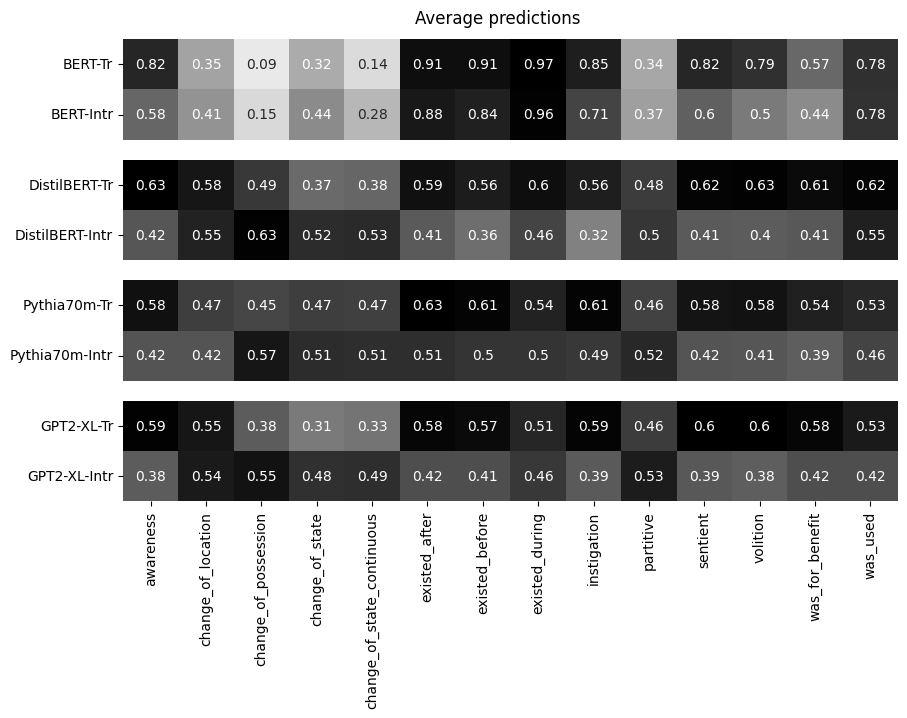

In [173]:
fig, axs = plt.subplots(4,1, figsize = (10,6))

colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
cmap = divergentGrays

#BERT
maxv = 0
for mat in mean_comparison.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))
sns.heatmap(mean_comparison, ax = axs[0], cmap = cmap, cbar = False, annot = True, xticklabels= False, vmax=maxv, vmin = -maxv)

# DistilBERT
maxv = 0
for mat in avg_pred[:2].values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))
sns.heatmap(avg_pred[:2], ax = axs[1], cmap = cmap, cbar = False, annot = True, xticklabels= False, vmax=maxv, vmin = -maxv)

#GPT
maxv = 0
for mat in avg_pred[2:4].values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))
sns.heatmap(avg_pred[2:4], ax = axs[2], cmap = cmap, cbar = False, annot = True, xticklabels= False,vmax=maxv, vmin = -maxv)

#Pythia
maxv = 0
for mat in avg_pred[4:].values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))  
sns.heatmap(avg_pred[4:], ax = axs[3], cmap = cmap, cbar = False, annot = True, xticklabels= True,vmax=maxv, vmin = -maxv)
plt.suptitle("Average predictions", y = 0.93)
for ax in axs:
    ax.set_ylabel("")
plt.show()

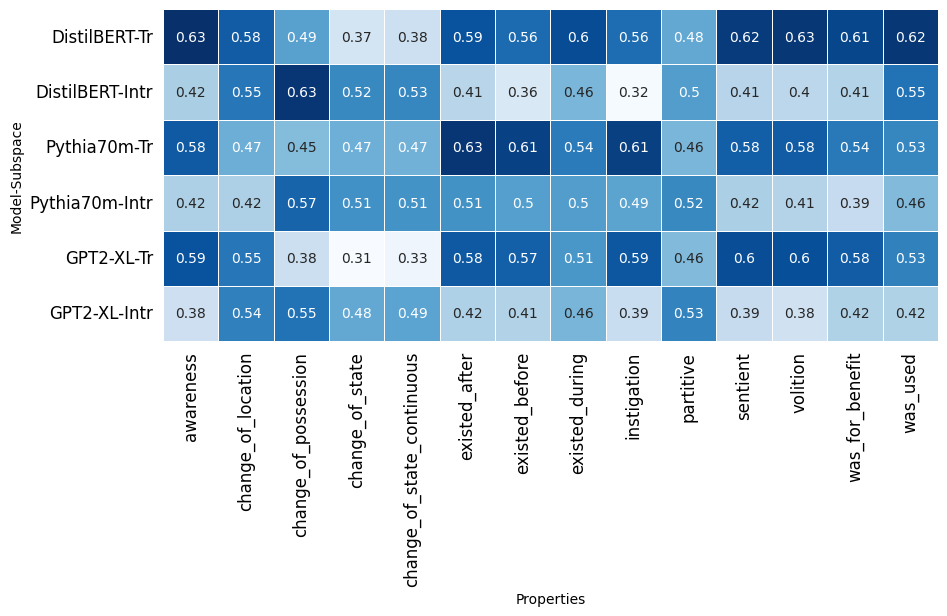

In [17]:
def plot_multiindex_heatmap(dataframe):
    #change to black and white
    
    
    # Create a heatmap
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(dataframe, cmap="Blues",square = True, linewidths=.5, annot = True,cbar = False)
    
    # remove ticks and set position and orientation for ticks label
    ax.tick_params(labeltop = False, labelbottom = True,
                labelsize = 12, bottom = False, left = False)
    # Set plot title and labels
    
    plt.xlabel("Properties")
    plt.ylabel("Model-Subspace")

    # Show the plot
    plt.show()

# Example usage:
# Assuming you already have 'final_df' as your DataFrame
plot_multiindex_heatmap(avg_pred)

### relative differences between subspaces

In [119]:
def get_rel_diff(df, model_name:str):
    new_df_dict = {}
    values = df.loc[model_name].round(2).values
    rel_diff = np.subtract(values[0,:],values[1,:])
    new_df_dict[model_name] = rel_diff
    new_df = pd.DataFrame(new_df_dict, index = df.columns).T
    
    return new_df

rel_diff_df = pd.concat([get_rel_diff(avg_pred, model_name = i) for i in ["DistilBERT", "Pythia70m", "GPT2-XL"]])
rel_diff_df


,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
DistilBERT,0.21,0.03,-0.14,-0.15,-0.15,0.18,0.20,0.14,0.24,-0.02,0.21,0.23,0.20,0.07
Pythia70m,0.16,0.05,-0.12,-0.04,-0.04,0.12,0.11,0.04,0.12,-0.06,0.16,0.17,0.15,0.07
GPT2-XL,0.21,0.01,-0.17,-0.17,-0.16,0.16,0.16,0.05,0.20,-0.07,0.21,0.22,0.16,0.11


In [ ]:
rel_diff_df.to_tex("", format = "%2f")

In [123]:
v1 = mean_comparison.round(2).values[0,:]
v2 = mean_comparison.round(2).values[1,:]

bert_mean_diff = np.subtract(v1,v2)
bert_mean_diff

array([ 0.24, -0.06, -0.06, -0.12, -0.14,  0.03,  0.07,  0.01,  0.14,
       -0.03,  0.22,  0.29,  0.13,  0.  ])

In [138]:
bert_rel_diff = pd.DataFrame(zip(rel_diff_df.columns,bert_mean_diff)).set_index(0).T
bert_rel_diff.index.name = "BERT"

In [156]:
all_rel_diff = pd.concat([bert_rel_diff, rel_diff_df])
new_index = rel_diff_df.index.tolist()
new_index.insert(0,"BERT")
all_rel_diff.index = new_index
all_rel_diff

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
BERT,0.24,-0.06,-0.06,-0.12,-0.14,0.03,0.07,0.01,0.14,-0.03,0.22,0.29,0.13,0.00
DistilBERT,0.21,0.03,-0.14,-0.15,-0.15,0.18,0.20,0.14,0.24,-0.02,0.21,0.23,0.20,0.07
Pythia70m,0.16,0.05,-0.12,-0.04,-0.04,0.12,0.11,0.04,0.12,-0.06,0.16,0.17,0.15,0.07
GPT2-XL,0.21,0.01,-0.17,-0.17,-0.16,0.16,0.16,0.05,0.20,-0.07,0.21,0.22,0.16,0.11


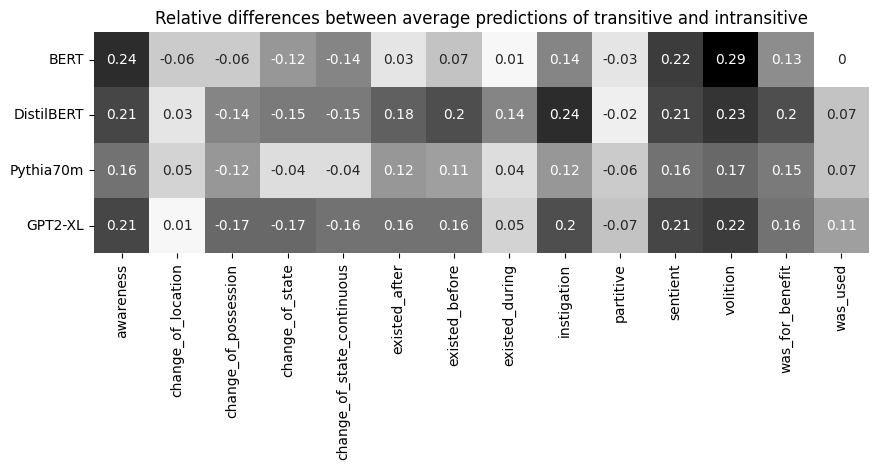

In [167]:
colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
cmap = divergentGrays
plt.figure(figsize=(10,6))
maxv = 0
for mat in all_rel_diff.values:    
    maxv = max(maxv, max(mat.max(), - mat.min()))

sns.heatmap(all_rel_diff, cmap = cmap, cbar = False, square= True,annot= True, vmax = maxv, vmin = -maxv)
plt.title("Relative differences between average predictions of transitive and intransitive")
plt.show()